In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-05-20 to 2019-07-05 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

50


,len,mean,std,shrp,drawdown
Symbols,,,,,
RUSL,28,5.417248,3.955889,1.359382,3.627551
EDC,28,4.102723,4.459155,0.911168,6.771041
EET,28,2.715153,2.961113,0.903536,4.599511
UST,28,1.065205,1.163813,0.881175,1.376221
BRZU,28,7.320674,8.372106,0.869673,7.626808
LBJ,28,5.056858,5.778396,0.868264,7.729469
GDXX,28,7.833176,9.151959,0.851566,12.050224
TYD,28,1.504513,1.745078,0.839407,2.271841
NUGT,28,11.901151,14.146819,0.838455,17.417822


evicted UWM 0.8944247428767147
evicted EET 0.8731283461466955
evicted UYM 0.7300696407004401
evicted YINN 0.894089608463267
evicted DFEN 0.6097694396697793
evicted BRZU 0.5868712163235065
evicted GDXX 0.5710325445456884
evicted LABU 0.4990533540490221
evicted CHAU 0.5515932068755635
retry backlogs ['EDC', 'UYG', 'FAS', 'UXI', 'SPXL', 'JNUG', 'MIDU', 'MVV', 'SSO', 'EURL', 'UPRO', 'UMDD', 'XPP', 'UBT', 'SOXL', 'URTY', 'DDM', 'QLD', 'TNA', 'SAA', 'CURE', 'PPLC', 'ROM', 'BIB', 'NUGT', 'UST', 'UCC', 'RXL', 'UDOW', 'JPNL', 'DZK', 'LBJ', 'TYD', 'TECL', 'UBIO'] at 0.905 - 2.051
evicted SAA 0.9008877419952214
evicted EDC 0.8744726711604027
evicted CURE 0.8980554537474927
evicted DZK 0.8743049983128804
evicted XPP 0.6268407252371391
evicted BIB 0.6535811993049003
evicted LBJ 0.5027985305006647
evicted JNUG 0.5406429410719232
retry backlogs ['UXI', 'EURL', 'UYG', 'SPXL', 'UBIO', 'UMDD', 'MIDU', 'SSO', 'TYD', 'PPLC', 'DDM', 'FAS', 'URTY', 'ROM', 'RXL', 'TMF', 'TNA', 'UPRO', 'MVV', 'QLD', 'UCC', 'U

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,2.795766,1.353665,-0.032599,1.653668,2.905760,3.712773,5.457912,2.036015,1.883520
RUSL,28.0,5.417248,3.955889,-0.472713,2.116818,5.708480,8.764325,12.665445,1.359382,3.627551
UBT,28.0,1.875959,2.534757,-2.935063,0.130435,1.016092,2.968249,7.829477,0.724439,3.493592
USD,28.0,3.462474,6.847894,-9.487657,-2.066604,4.646147,7.675010,18.648743,0.499831,11.330986
UCC,28.0,1.850602,4.219546,-5.959743,-1.492245,2.585094,4.772811,11.046148,0.429174,9.066746
FINU,28.0,2.175071,6.287277,-7.429561,-1.859974,1.686258,6.373646,13.759826,0.339636,12.579854
INDL,28.0,0.997480,4.489190,-7.119734,-1.801870,0.675693,4.675728,8.460054,0.213356,11.572590


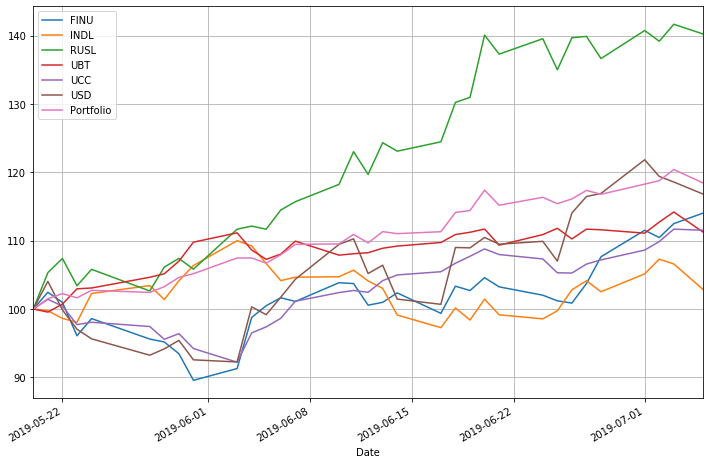

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio()
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote2 = Quote(['TMF', 'SPXL'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)